## Clustering

We use a simple k-means algorithm to demonstrate how clustering can be done. Clustering can help discover valuable, hidden groupings within the data. The dataset is created in the [Obtain_dataset Notebook](Obtain_dataset.ipynb).

In [217]:
# imports
import numpy as np
import pandas as pd
from ast import literal_eval
# load data
datafile_path = "../2-Data/dialogues_embededd.pkl"
df = pd.read_pickle(datafile_path)

In [218]:
df

,Description,Patient,Doctor,combined,n_tokens,embedding
0,Q. What does abutment of the nerve root mean?,"Hi doctor,I am just wondering what is abutting...",Hi. I have gone through your query with dilige...,Description: Q. What does abutment of the nerv...,95,"[-0.109211065, -0.17469415, 0.18996556, 0.0599..."
1,Q. What should I do to reduce my weight gained...,"Hi doctor, I am a 22-year-old female who was d...",Hi. You have really done well with the hypothy...,Description: Q. What should I do to reduce my ...,519,"[-0.014065318, 0.0440334, 0.26095688, 0.086799..."
2,Q. I have started to get lots of acne on my fa...,Hi doctor! I used to have clear skin but since...,Hi there Acne has multifactorial etiology. Onl...,Description: Q. I have started to get lots of ...,285,"[-0.39175138, -0.025890486, -0.024644196, -0.0..."
3,Q. Why do I have uncomfortable feeling between...,"Hello doctor,I am having an uncomfortable feel...",Hello. The popping and discomfort what you fel...,Description: Q. Why do I have uncomfortable fe...,324,"[-0.29406005, -0.31878802, 0.27588362, 0.09649..."
4,Q. My symptoms after intercourse threatns me e...,"Hello doctor,Before two years had sex with a c...",Hello. The HIV test uses a finger prick blood ...,Description: Q. My symptoms after intercourse ...,442,"[-0.36187398, 0.18491694, -0.3090741, -0.30197..."
...,...,...,...,...,...,...
995,Q. My lax les is 38 cm with inflamed gastric f...,"Hello doctor, My lax les is 38 cm with inflame...",Hello. Gastritis is an inflammation of stomach...,Description: Q. My lax les is 38 cm with infla...,214,"[-0.1555396, -0.44157797, -0.15364785, 0.25760..."
996,Q. I am suffering from mood swings. Kindly adv...,"Hello doctor,I want to get some information re...",Hello. Let me answer your questions via some b...,Description: Q. I am suffering from mood swing...,491,"[-0.2296337, 0.119730674, 0.37153018, 0.062901..."
997,Q. I am having swollen lymph node in my neck. ...,"Hello doctor, I went to the chiropractor and g...",Hello. I do not think that because of chiropra...,Description: Q. I am having swollen lymph node...,395,"[-0.10149522, -0.33532476, 0.40812746, -0.2713..."
998,Q. How good is Albenza for a raccoon roundworm...,"Hello doctor,I am concerned about a possible r...",Hello. Albendazole 400 mg single star dose is ...,Description: Q. How good is Albenza for a racc...,240,"[-0.06408733, 0.17669381, 0.09132431, -0.09456..."


In [263]:
df["embedding"] = df.embedding.apply(np.array)  # convert string to numpy array
matrix = np.vstack(df.embedding.values)
matrix.shape


(1000, 384)

In [264]:

#df["embedding_doctor"] = df.embedding_doctor.apply(np.array)  # convert string to numpy array
#matrix = np.vstack(df.embedding_doctor.values)
#matrix.shape


In [265]:
df

,Description,Patient,Doctor,combined,n_tokens,embedding
0,Q. What does abutment of the nerve root mean?,"Hi doctor,I am just wondering what is abutting...",Hi. I have gone through your query with dilige...,Description: Q. What does abutment of the nerv...,95,"[-0.109211065, -0.17469415, 0.18996556, 0.0599..."
1,Q. What should I do to reduce my weight gained...,"Hi doctor, I am a 22-year-old female who was d...",Hi. You have really done well with the hypothy...,Description: Q. What should I do to reduce my ...,519,"[-0.014065318, 0.0440334, 0.26095688, 0.086799..."
2,Q. I have started to get lots of acne on my fa...,Hi doctor! I used to have clear skin but since...,Hi there Acne has multifactorial etiology. Onl...,Description: Q. I have started to get lots of ...,285,"[-0.39175138, -0.025890486, -0.024644196, -0.0..."
3,Q. Why do I have uncomfortable feeling between...,"Hello doctor,I am having an uncomfortable feel...",Hello. The popping and discomfort what you fel...,Description: Q. Why do I have uncomfortable fe...,324,"[-0.29406005, -0.31878802, 0.27588362, 0.09649..."
4,Q. My symptoms after intercourse threatns me e...,"Hello doctor,Before two years had sex with a c...",Hello. The HIV test uses a finger prick blood ...,Description: Q. My symptoms after intercourse ...,442,"[-0.36187398, 0.18491694, -0.3090741, -0.30197..."
...,...,...,...,...,...,...
995,Q. My lax les is 38 cm with inflamed gastric f...,"Hello doctor, My lax les is 38 cm with inflame...",Hello. Gastritis is an inflammation of stomach...,Description: Q. My lax les is 38 cm with infla...,214,"[-0.1555396, -0.44157797, -0.15364785, 0.25760..."
996,Q. I am suffering from mood swings. Kindly adv...,"Hello doctor,I want to get some information re...",Hello. Let me answer your questions via some b...,Description: Q. I am suffering from mood swing...,491,"[-0.2296337, 0.119730674, 0.37153018, 0.062901..."
997,Q. I am having swollen lymph node in my neck. ...,"Hello doctor, I went to the chiropractor and g...",Hello. I do not think that because of chiropra...,Description: Q. I am having swollen lymph node...,395,"[-0.10149522, -0.33532476, 0.40812746, -0.2713..."
998,Q. How good is Albenza for a raccoon roundworm...,"Hello doctor,I am concerned about a possible r...",Hello. Albendazole 400 mg single star dose is ...,Description: Q. How good is Albenza for a racc...,240,"[-0.06408733, 0.17669381, 0.09132431, -0.09456..."



## 1. Find the number of clusters

In [266]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn

In [267]:
df["embedding"] = df.embedding.apply(np.array)  # convert string to numpy array

In [268]:
X=df.iloc[:, 5].values

In [269]:
#df.iloc[:, 5]

In [270]:
X_input=[embed.tolist() for embed in X]

In [271]:
#this is your array with the values
X = np.array(X_input)

In [272]:
len(X_input)

1000

In [273]:
len(X_input[:2][1])

384

In [274]:
X

array([[-0.10921106, -0.17469415,  0.18996556, ...,  0.23970637,
         0.16743004, -0.05469465],
       [-0.01406532,  0.0440334 ,  0.26095688, ..., -0.24024209,
        -0.437574  , -0.01724739],
       [-0.39175138, -0.02589049, -0.0246442 , ..., -0.23134355,
        -0.10085639,  0.1496634 ],
       ...,
       [-0.10149522, -0.33532476,  0.40812746, ...,  0.1181079 ,
         0.02715531,  0.15930209],
       [-0.06408733,  0.17669381,  0.09132431, ..., -0.21813951,
        -0.44568342, -0.08100373],
       [ 0.03657364,  0.24297515,  0.09555141, ...,  0.17485163,
         0.18589231, -0.14308901]])

In [277]:
from sklearn.cluster import KMeans
wcss = [] 
max=20
for i in range(1, max): 
    kmeans = KMeans(n_init = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

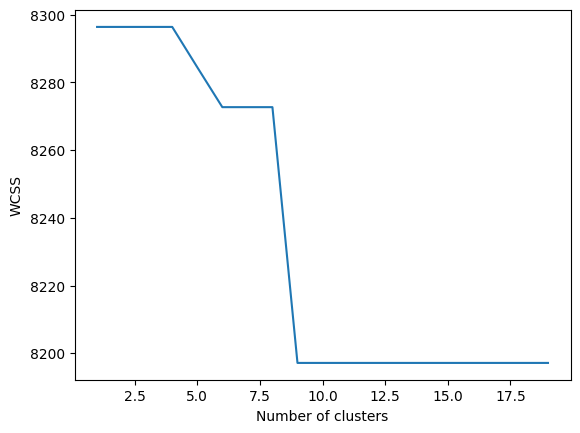

In [278]:
plt.plot(range(1, max), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

### 1. Find the clusters using K-means

We show the simplest use of K-means. You can pick the number of clusters that fits your use case best.

In [284]:
from sklearn.cluster import KMeans
n_clusters = 7
kmeans = KMeans(n_init=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

In [285]:
df

,Description,Patient,Doctor,combined,n_tokens,embedding,Cluster
0,Q. What does abutment of the nerve root mean?,"Hi doctor,I am just wondering what is abutting...",Hi. I have gone through your query with dilige...,Description: Q. What does abutment of the nerv...,95,"[-0.109211065, -0.17469415, 0.18996556, 0.0599...",7
1,Q. What should I do to reduce my weight gained...,"Hi doctor, I am a 22-year-old female who was d...",Hi. You have really done well with the hypothy...,Description: Q. What should I do to reduce my ...,519,"[-0.014065318, 0.0440334, 0.26095688, 0.086799...",4
2,Q. I have started to get lots of acne on my fa...,Hi doctor! I used to have clear skin but since...,Hi there Acne has multifactorial etiology. Onl...,Description: Q. I have started to get lots of ...,285,"[-0.39175138, -0.025890486, -0.024644196, -0.0...",3
3,Q. Why do I have uncomfortable feeling between...,"Hello doctor,I am having an uncomfortable feel...",Hello. The popping and discomfort what you fel...,Description: Q. Why do I have uncomfortable fe...,324,"[-0.29406005, -0.31878802, 0.27588362, 0.09649...",4
4,Q. My symptoms after intercourse threatns me e...,"Hello doctor,Before two years had sex with a c...",Hello. The HIV test uses a finger prick blood ...,Description: Q. My symptoms after intercourse ...,442,"[-0.36187398, 0.18491694, -0.3090741, -0.30197...",6
...,...,...,...,...,...,...,...
995,Q. My lax les is 38 cm with inflamed gastric f...,"Hello doctor, My lax les is 38 cm with inflame...",Hello. Gastritis is an inflammation of stomach...,Description: Q. My lax les is 38 cm with infla...,214,"[-0.1555396, -0.44157797, -0.15364785, 0.25760...",0
996,Q. I am suffering from mood swings. Kindly adv...,"Hello doctor,I want to get some information re...",Hello. Let me answer your questions via some b...,Description: Q. I am suffering from mood swing...,491,"[-0.2296337, 0.119730674, 0.37153018, 0.062901...",4
997,Q. I am having swollen lymph node in my neck. ...,"Hello doctor, I went to the chiropractor and g...",Hello. I do not think that because of chiropra...,Description: Q. I am having swollen lymph node...,395,"[-0.10149522, -0.33532476, 0.40812746, -0.2713...",4
998,Q. How good is Albenza for a raccoon roundworm...,"Hello doctor,I am concerned about a possible r...",Hello. Albendazole 400 mg single star dose is ...,Description: Q. How good is Albenza for a racc...,240,"[-0.06408733, 0.17669381, 0.09132431, -0.09456...",0


In [286]:
#df.groupby(['Cluster'])['Score'].mean()


In [287]:
#df.groupby("Cluster").Score.mean().sort_values()

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

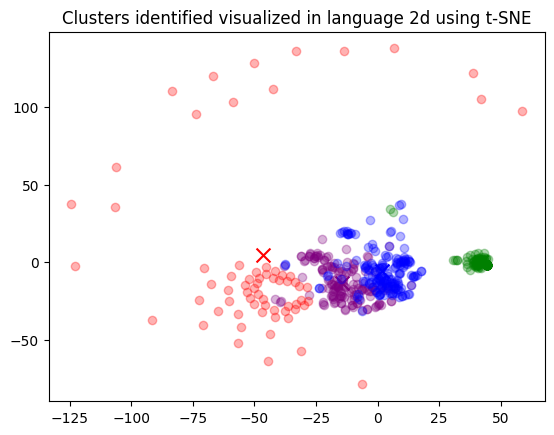

In [288]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)
    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")


Visualization of clusters in a 2d projection. In this run, the green cluster (#1) seems quite different from the others. Let's see a few samples from each cluster.